In [1]:
import warnings
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import umap
import sys
import utilities as ut
from Network import Net
import Network as nn
import matplotlib.pylab as pylab
from utilities import *

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
path_train = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Train_rrlyr-1.csv'
path_test = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Test_rrlyr-1.csv'
#path_train = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Train_rrlyr-1_RRd.csv'
#path_test = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Test_rrlyr-1_RRd.csv'


lc_test = pd.read_table(path_test, sep= ',')
#lc_test = lc_test[lc_test.label=='ClassA']
lc_train = pd.read_table(path_train, sep= ',')
#lc_train = lc_train[lc_train.label=='ClassA']

In [3]:
lc_train.PeriodLS.describe()

count    391501.000000
mean        318.592467
std         981.826493
min           0.000723
25%           0.997332
50%          21.584813
75%         222.518378
max       16915.691820
Name: PeriodLS, dtype: float64

In [4]:
lc_test.PeriodLS.describe()

count    28625.000000
mean        32.403961
std        346.200829
min          0.001353
25%          0.318731
50%          0.543678
75%          0.894114
max      13199.617020
Name: PeriodLS, dtype: float64

In [5]:
lc_train['label'].value_counts()

ClassB    362654
ClassA     28847
Name: label, dtype: int64

In [6]:
example_test  = lc_test['ID'].sample(15)
example_train = lc_train['ID'].sample(15)

In [7]:
import seaborn as sns
sns.set_theme(style="white")


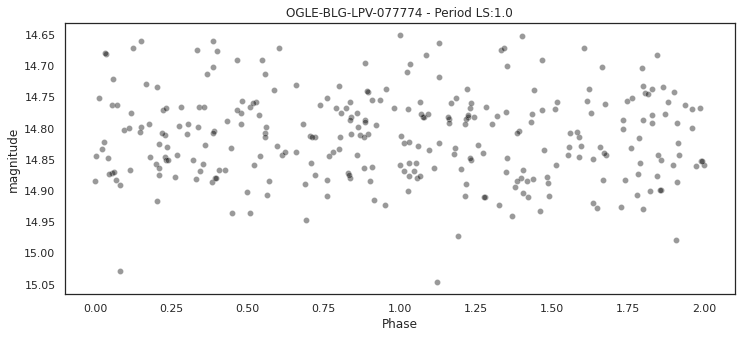

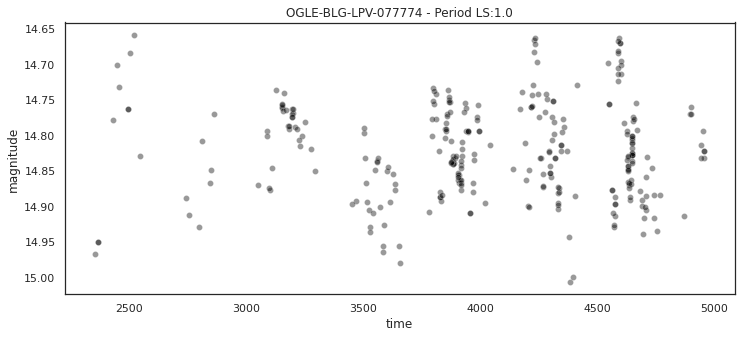

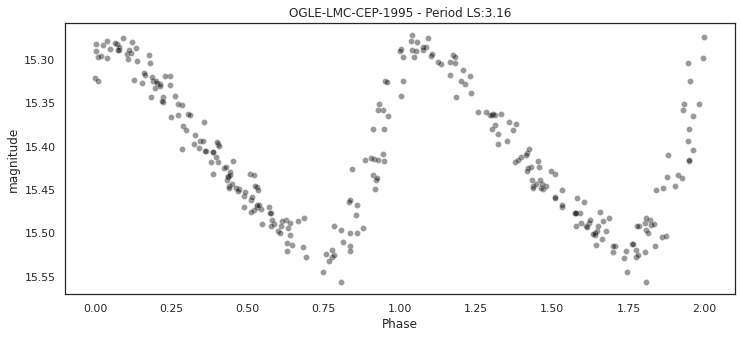

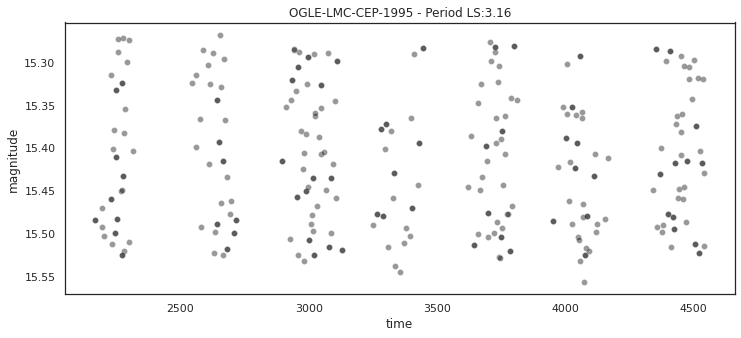

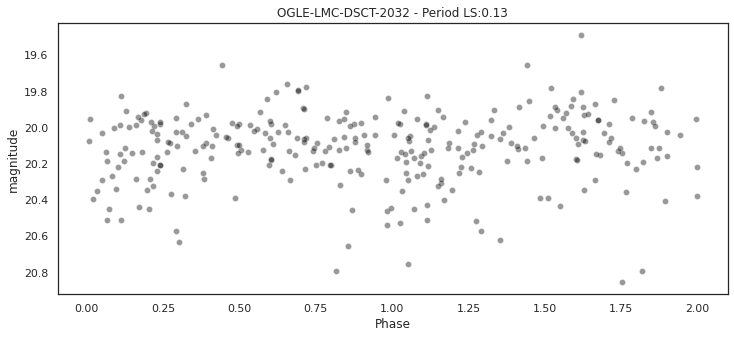

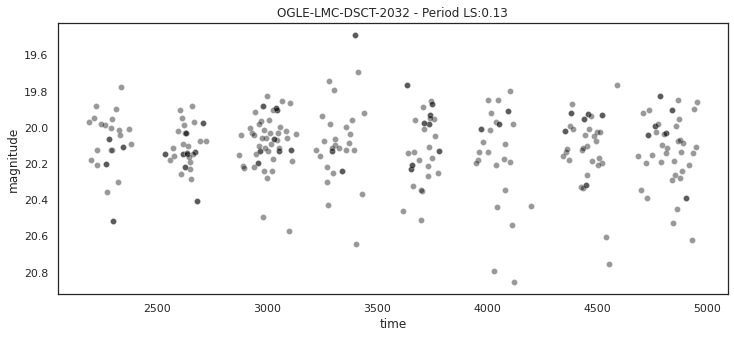

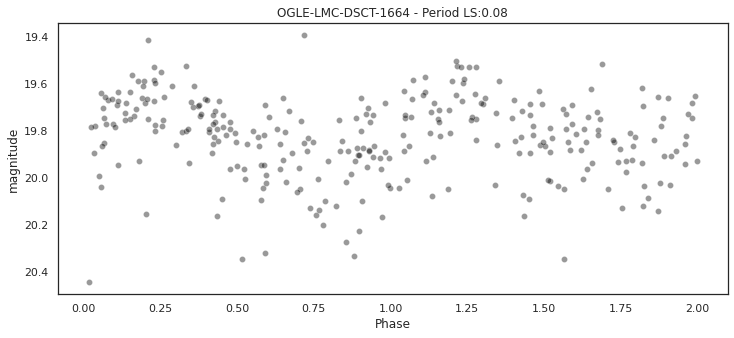

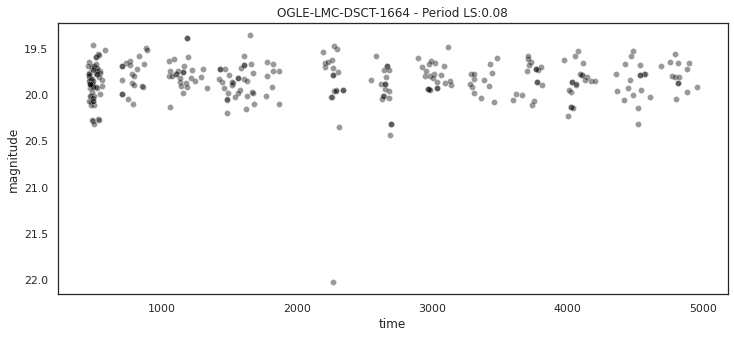

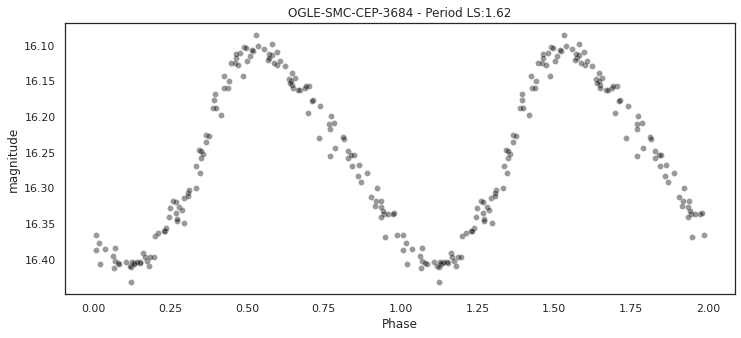

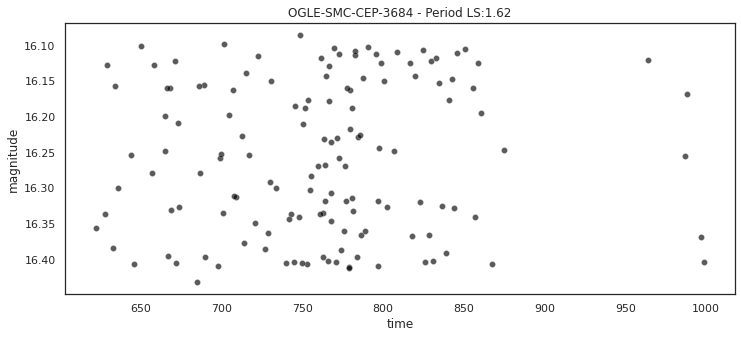

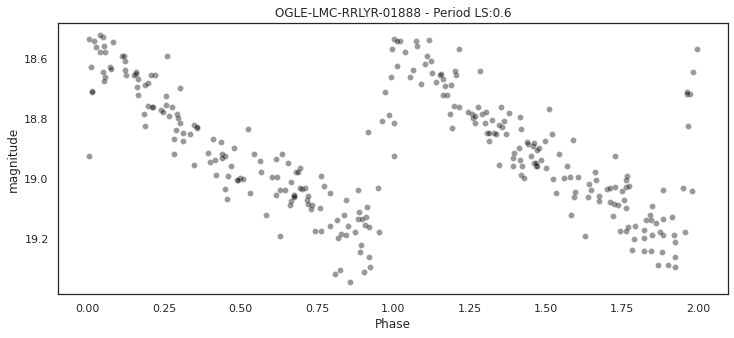

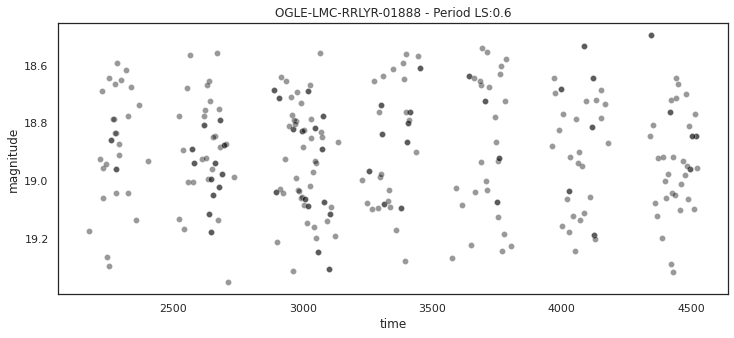

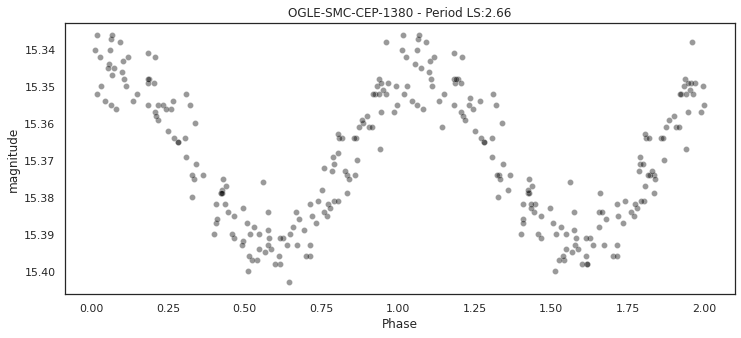

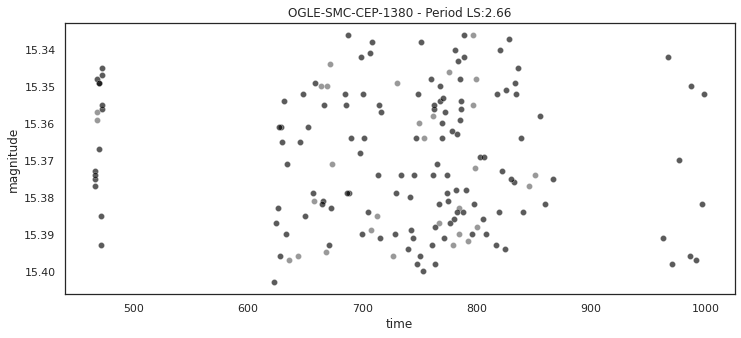

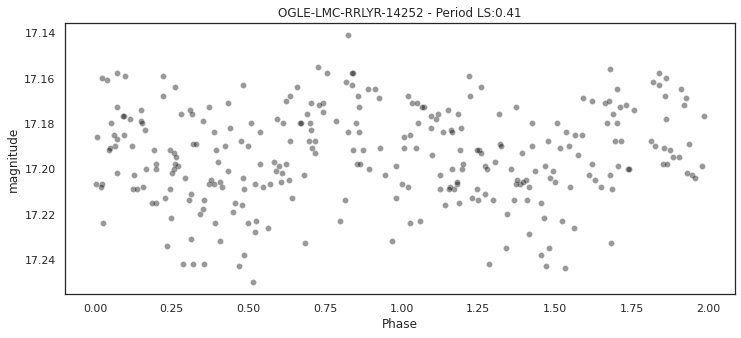

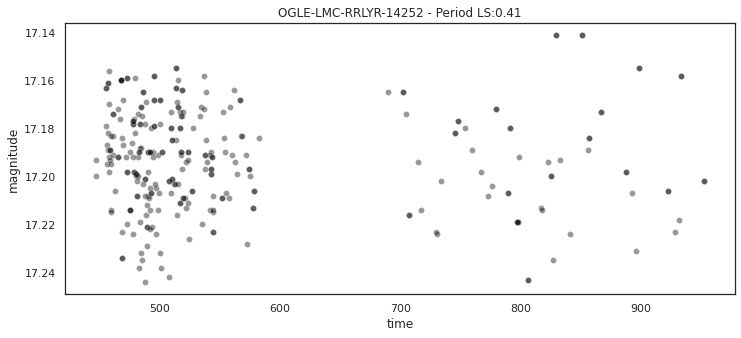

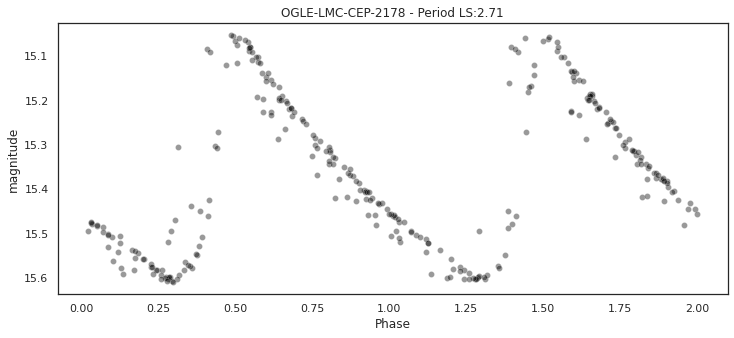

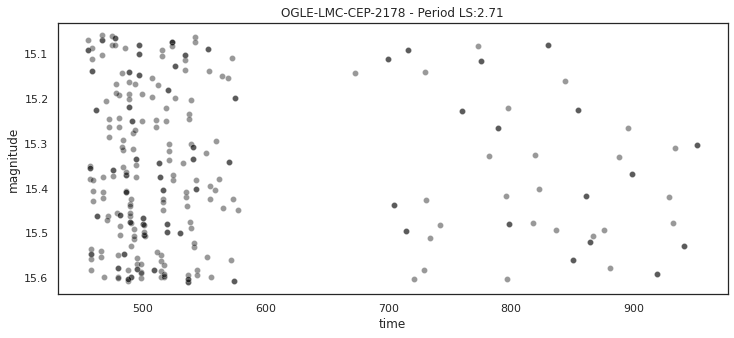

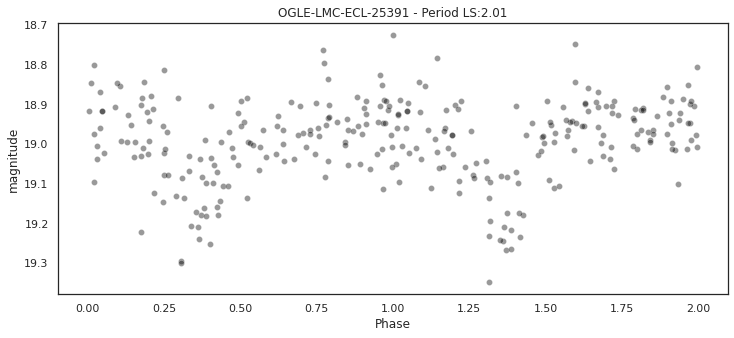

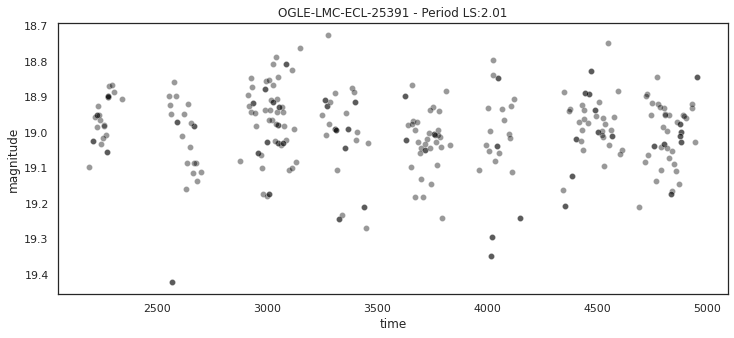

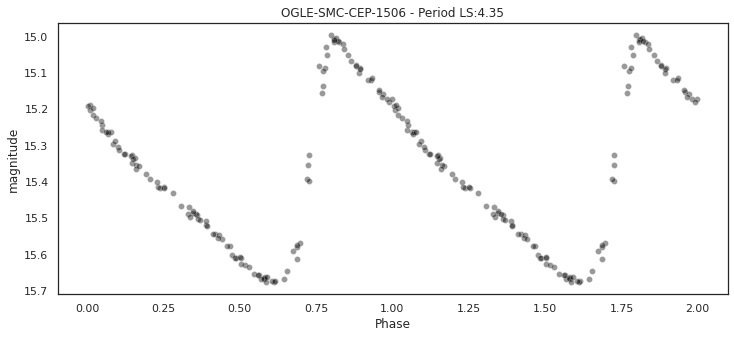

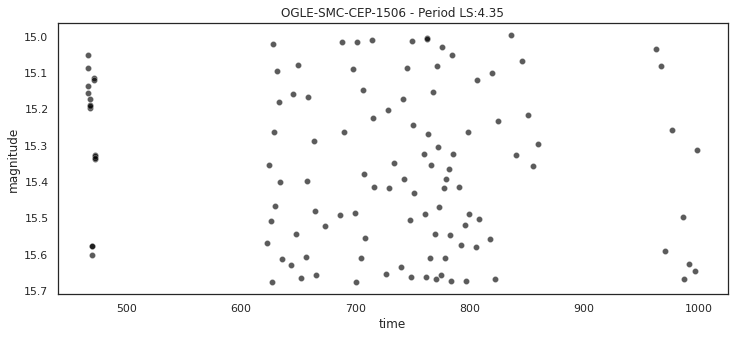

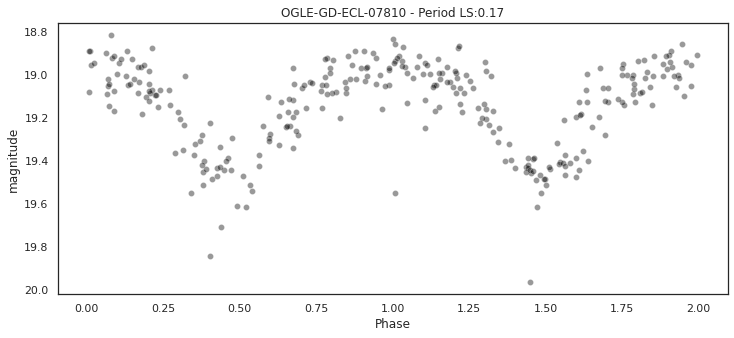

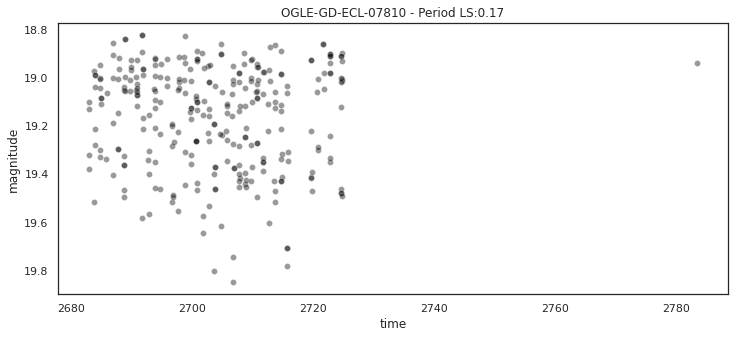

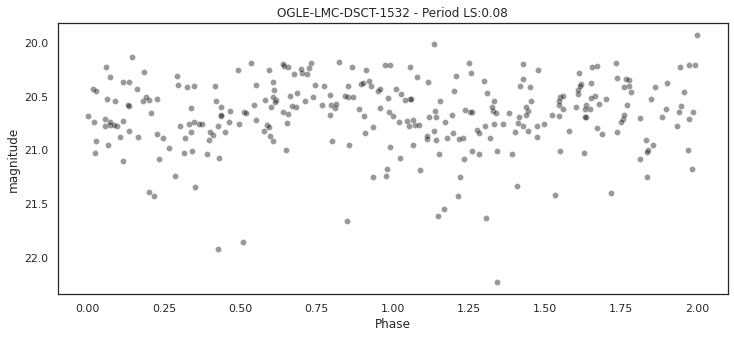

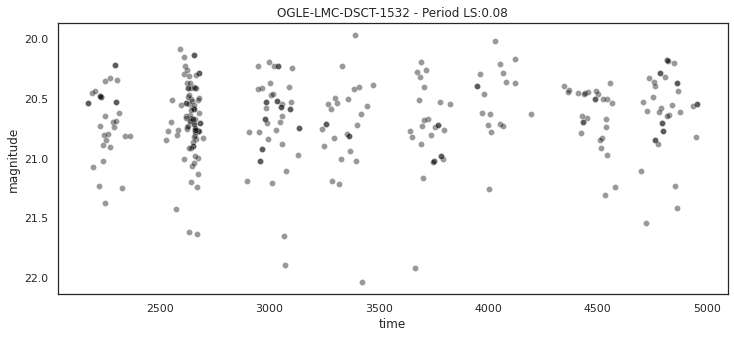

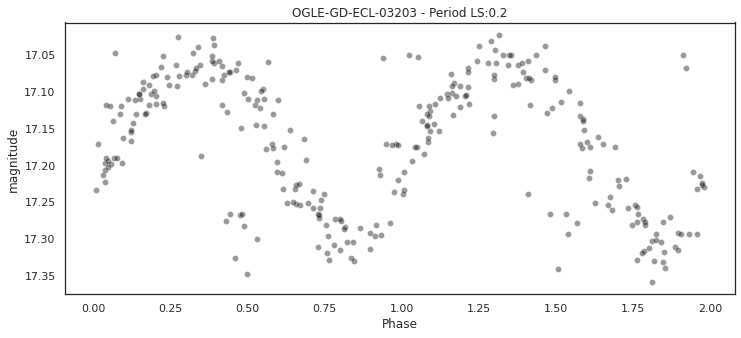

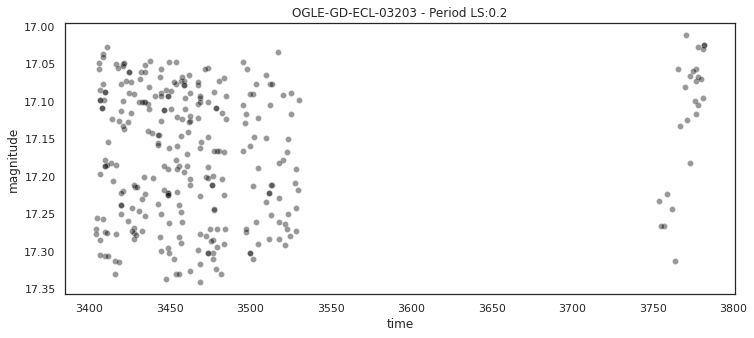

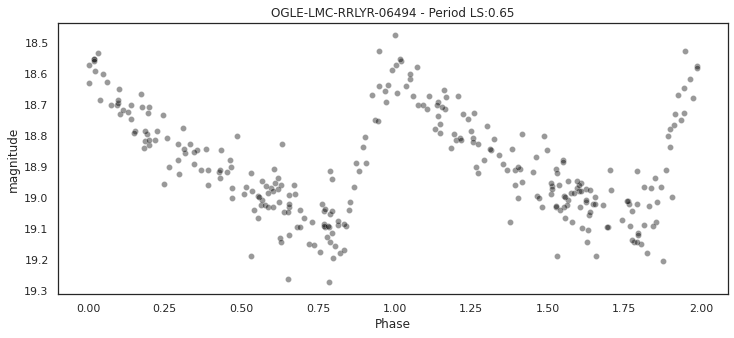

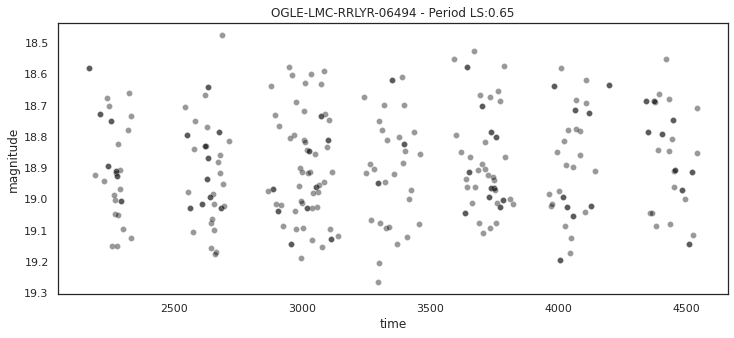

In [8]:
for lc in example_test.unique():
    try:
        new_test = lc_test[lc_test.ID==lc].ID.str.split("-", n = 3, expand = True)
        period = lc_test[lc_test.ID==lc].PeriodLS.values[0]
        field = new_test[new_test.columns[1]].values[0].lower()
        
        lcu = pd.read_table('/home/franciscoperez/Desktop/Code/FATS/LCsOGLE/data/'+field+'/'+lc.split('-')[2].lower()+'/phot/I/'+lc,sep=" ", names=['time', 'magnitude', 'error'])
        #print(lc)
        m0 = lcu.magnitude.min()
        t0 = lcu[lcu.magnitude==m0].time.min()
        lcu['Phase'] = ((lcu.time-t0)/period)%1 
        lcu = lcu.dropna()
        #print(lcu.magnitude.min())

        #lcu = lcu.sort_values('magnitude', ascending=False).reset_index()

        #print(lcu[lcu.magnitude==lcu.magnitude.min()])



        #index_min_phase = lcu[lcu.magnitude==lcu.magnitude.min()].index.values[0]
        #print(index_max_phase)
        #lcu = lcu.iloc[(index_max_phase-1):lcu.shape[0]]
        #print(lcu)

        lcu2 =  lcu.copy()
        lcu2['Phase'] = lcu2['Phase']+1
        lcu = pd.concat([lcu,lcu2])
        sample = 300
        if lcu.dropna().shape[0]<300: 
            sample=lcu.dropna().shape[0]
        fig, ax=plt.subplots(figsize=(12, 5))
        sns.scatterplot(x="Phase", y="magnitude",
                 data=lcu.dropna().sample(sample), alpha =0.4, color='black')
        plt.title(lc.replace('.dat', '')+' - Period LS:' + str(np.round(period,2)))
        ax.invert_yaxis()
        plt.show()

        fig, ax=plt.subplots(figsize=(12, 5))
        sns.scatterplot(x="time", y="magnitude",
                 data=lcu.dropna().sample(sample), alpha =0.4, color='black')
        plt.title(lc.replace('.dat', '')+' - Period LS:' + str(np.round(period,2)))
        ax.invert_yaxis()
        plt.show()
    except Exception as error:
        print(error)

In [9]:
 for lc in example_train.unique():
    
    print(lc)
    new_train = lc_train[lc_train.ID==lc].ID.str.split("-", n = 3, expand = True)
    #print(new_train)
    period = lc_train[lc_train.ID==lc].PeriodLS.values[0]
    field = new_train[new_train.columns[1]].values[0].lower()
    lcu = pd.read_table('/home/franciscoperez/Desktop/Code/FATS/LCsOGLE/data/'+field+'/rrlyr/phot/I/'+lc+'.dat',sep=" ", names=['time', 'magnitude', 'error'])
    #print(lc)
    m0 = lcu.magnitude.min()
    t0 = lcu[lcu.magnitude==m0].time.min()

    lcu['Phase'] = ((lcu.time-t0)/period)%1 
    lcu = lcu.dropna()

    lcu2 =  lcu.copy()
    lcu2['Phase'] = lcu2['Phase']+1
    lcu = pd.concat([lcu,lcu2])
    
    
    sample = 300
    if lcu.dropna().shape[0]<300: 
        sample=lcu.dropna().shape[0]
    fig, ax=plt.subplots(figsize=(12, 5))
    sns.scatterplot(x="Phase", y="magnitude",
             data=lcu.dropna().sample(sample), alpha =0.4, color='black')
    plt.title(lc.replace('.dat', '')+' - Period LS:' + str(np.round(period,2)))
    ax.invert_yaxis()
    plt.show()
    
    


OGLE-BLG-LPV-158763.dat


FileNotFoundError: [Errno 2] No such file or directory: '/home/franciscoperez/Desktop/Code/FATS/LCsOGLE/data/blg/rrlyr/phot/I/OGLE-BLG-LPV-158763.dat.dat'

In [ ]:
train_dataset, test_dataset = ut.load_files(dataset=1)


In [ ]:
train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)

In [ ]:
train_dataset.columns

In [ ]:
data_total = pd.concat([train_dataset, test_dataset])
y = data_total['label']
del data_total['label']

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total, y, stratify=y, random_state=42)

from sklearn.ensemble import RandomForestClassifier

feature_names = [data_total.columns[i] for i in range(data_total.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(20, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
dfff = forest_importances.sort_values(ascending=False)[:30].reset_index()

columns_for_ranges= dfff[dfff.columns[0]].to_list()

In [ ]:
selected_features = ['PeriodLS', 'Amplitude', 'MedianAbsDev', 'Q31', 'Mean', 'Std', 'Freq1_harmonics_amplitude_0']

In [ ]:
d_train = train_dataset[(train_dataset.label=='ClassA') & (train_dataset.PeriodLS<5)][selected_features].sample(500)
G =sns.pairplot(d_train)
G.map_diag(plt.hist)
G.map_upper(plt.scatter)
G.map_lower(sns.kdeplot, alpha=0.2)

In [ ]:
d_test = test_dataset[(test_dataset.label=='ClassA')& (test_dataset.PeriodLS<5)][selected_features]
G= sns.pairplot(d_test)
G.map_diag(plt.hist)
G.map_upper(plt.scatter)
G.map_lower(sns.kdeplot, alpha=0.2)

In [ ]:
d_train = train_dataset[(train_dataset.label=='ClassA') & (train_dataset.PeriodLS<1.5)][selected_features].sample(1000)
d_test = test_dataset[(test_dataset.label=='ClassA')& (test_dataset.PeriodLS<1.5)][selected_features].sample(1000)
d_train['set'] = 'c-type RR Lyrae training set'
d_test['set'] = 'c-type RR Lyrae testing set'

In [ ]:
data_final = pd.concat([d_train, d_test])

In [ ]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":16, "font_scale":1.25, "axes.titlesize":16,"axes.labelsize":16,
                "xtick.labelsize":16, "ytick.labelsize":16, "legend.fontsize":16, "legend.title_fontsize": 16, 
                            "legend.loc": 'upper center', "alpha":0.2}) 
G= sns.pairplot(data_final, hue='set', palette='rocket')
G._legend.remove()
G.map_diag(sns.kdeplot)
G.map_upper(sns.kdeplot, shade =True)
G.map_lower(sns.kdeplot, shade =False)
handles = G._legend_data.values()
labels = G._legend_data.keys()
G.fig.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(0.0, 1.05), ncol=2)
plt.show()

In [ ]:
g = sns.PairGrid(data_final, hue='set', palette='rocket')
g.map_diag(sns.kdeplot,  shade=True)
g.map_upper(sns.kdeplot, shade=True)
g.map_lower(sns.kdeplot)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(0.0, 1.05), ncol=2)

In [ ]:
#path_train = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Train_rrlyr-1.csv'
#path_test = '/home/franciscoperez/Documents/GitHub/data/BIASEDFATS/Test_rrlyr-1.csv'


lc_test = pd.read_table(path_test, sep= ',')
lc_train = pd.read_table(path_train, sep= ',')
lc_test['label'] = lc_test['ID']
lc_train['label'] = lc_train['ID']

lc_train =  lc_train.drop(['Pred', 'Pred2', 'h', 'e', 'u', 'ID'], axis = 1)
lc_test =  lc_test.drop(['Pred', 'Pred2', 'h', 'e', 'u', 'ID'], axis = 1)

for col in lc_train.columns:
    if col not in ['label']:
        if lc_train[col].var()==0:
            print(col)
            del lc_train[col]
            
for col in lc_test.columns:
    if col not in ['label']:
        if lc_test[col].var()==0:
            print(col)
            del lc_test[col]

In [ ]:
lc_train, lc_test = ut.delete_outliers(lc_train, lc_test)

In [ ]:
lc_test['set'] = 'Testing'
lc_train['set'] = 'Training'

In [ ]:

new_train = lc_train['label'].str.split("-", n = 3, expand = True) 
new_test = lc_test['label'].str.split("-", n = 3, expand = True) 

lc_train["Field"]= new_train[1] 
lc_train['Class']= new_train[2]  

lc_test["Field"]= new_test[1] 
lc_test['Class']= new_test[2] 


total_set = pd.concat([lc_train, lc_test])
total_set['count'] = 1

total_set= total_set[['set', 'Class', 'count']].groupby(['set', 'Class']).sum().reset_index()

In [ ]:
pd.pivot(total_set, index='Class', columns='set', values='count').fillna(0).astype(int).sort_values('Testing', ascending=False).to_csv('resumenclasses.csv')

In [ ]:
df_to_range= pd.concat([train_dataset,test_dataset])

In [ ]:
path = '/home/franciscoperez/Desktop/Code/FATS/testOGLE/'
data, ID, class_col, classes = df_ogle= initialize_data(path, survey='OGLE')


In [ ]:
np.round(data[columns_for_ranges+['Class']].groupby('Class').quantile([0.01, 0.99]).T[['rrlyr', 'cep', 'ecl']],2).to_csv('range1.csv')

In [ ]:
np.round(data[columns_for_ranges+['Class']].groupby('Class').quantile([0.05, 0.95]).T[['rrlyr', 'cep', 'ecl']],2).to_csv('range2.csv')